In [1]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


In [2]:
#Add a datetime column based on the string in the "date" column
df['datetime'] = pd.to_datetime(df['date'])
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   object        
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   datetime      1462 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.7+ KB


,date,meantemp,humidity,wind_speed,meanpressure,datetime
0,2013-01-01,10.000000,84.5,0.000000,1015.666667,2013-01-01
1,2013-01-02,7.400000,92.0,2.980000,1017.800000,2013-01-02
2,2013-01-03,7.166667,87.0,4.633333,1018.666667,2013-01-03


In [3]:
## preview first row from the date column (string)
df.loc[0,'date']

'2013-01-01'

In [4]:
## preview first row from the datetime column (datetime64[ns])
df.loc[0,'datetime']

Timestamp('2013-01-01 00:00:00')

In [5]:
## demonstrate format code
fmt = "%B %d, %Y"
df.loc[0,'datetime'].strftime(fmt)

'January 01, 2013'

In [6]:
df['datetime_fmt'] = df['datetime'].dt.strftime(fmt)
df['datetime_fmt']

0        January 01, 2013
1        January 02, 2013
2        January 03, 2013
3        January 04, 2013
4        January 05, 2013
              ...        
1457    December 28, 2016
1458    December 29, 2016
1459    December 30, 2016
1460    December 31, 2016
1461     January 01, 2017
Name: datetime_fmt, Length: 1462, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   object        
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
 5   datetime      1462 non-null   datetime64[ns]
 6   datetime_fmt  1462 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 80.1+ KB


In [8]:
df['datetime'].dt.year.head()

0    2013
1    2013
2    2013
3    2013
4    2013
Name: datetime, dtype: int64

In [9]:
# Attempting to obtain year from a .dt.strftime object will NOT work!
# df['datetime_fmt'].dt.year.head()

In [10]:
df['datetime'].dt.month.head()

0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int64

In [11]:
## fiscal year quarter
df['datetime'].dt.quarter.head()

0    1
1    1
2    1
3    1
4    1
Name: datetime, dtype: int64

In [12]:
## day of the week - numeric
df['datetime'].dt.day_of_week.head()

0    1
1    2
2    3
3    4
4    5
Name: datetime, dtype: int64

In [13]:
## day of the week - String name
df['datetime'].dt.day_name().head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: datetime, dtype: object

In [14]:
df = df.set_index('datetime')
df

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,"January 01, 2013"
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,"January 02, 2013"
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,"January 03, 2013"
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,"January 04, 2013"
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,"January 05, 2013"
...,...,...,...,...,...,...
2016-12-28,2016-12-28,17.217391,68.043478,3.547826,1015.565217,"December 28, 2016"
2016-12-29,2016-12-29,15.238095,87.857143,6.000000,1016.904762,"December 29, 2016"
2016-12-30,2016-12-30,14.095238,89.666667,6.266667,1017.904762,"December 30, 2016"


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='datetime', length=1462, freq=None)

In [16]:
df.loc['2013']

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,"January 01, 2013"
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,"January 02, 2013"
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,"January 03, 2013"
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,"January 04, 2013"
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,"January 05, 2013"
...,...,...,...,...,...,...
2013-12-27,2013-12-27,11.875000,79.875000,1.162500,1018.625000,"December 27, 2013"
2013-12-28,2013-12-28,10.875000,70.000000,5.325000,1019.250000,"December 28, 2013"
2013-12-29,2013-12-29,10.571429,69.428571,5.325000,1018.500000,"December 29, 2013"


In [17]:
df.loc['2013':'2014']

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,"January 01, 2013"
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,"January 02, 2013"
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,"January 03, 2013"
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,"January 04, 2013"
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,"January 05, 2013"
...,...,...,...,...,...,...
2014-12-27,2014-12-27,10.375000,69.000000,2.775000,1018.625000,"December 27, 2014"
2014-12-28,2014-12-28,9.000000,86.000000,0.700000,1019.750000,"December 28, 2014"
2014-12-29,2014-12-29,11.125000,72.625000,1.387500,1017.250000,"December 29, 2014"


In [18]:
df.loc['2013':'06-2014']

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,"January 01, 2013"
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,"January 02, 2013"
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,"January 03, 2013"
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,"January 04, 2013"
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,"January 05, 2013"
...,...,...,...,...,...,...
2014-06-26,2014-06-26,32.500000,60.375000,3.237500,1001.000000,"June 26, 2014"
2014-06-27,2014-06-27,34.750000,48.500000,9.487500,1001.625000,"June 27, 2014"
2014-06-28,2014-06-28,34.875000,49.000000,5.787500,999.375000,"June 28, 2014"


In [19]:
# Just to demonstrate the flexibility, we can use different formats in one line of code
df.loc['March, 2013':'06-2014']

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2013-03-01,2013-03-01,17.333333,49.333333,24.066667,1016.333333,"March 01, 2013"
2013-03-02,2013-03-02,19.000000,54.000000,15.725000,1016.250000,"March 02, 2013"
2013-03-03,2013-03-03,19.333333,62.833333,8.633333,1016.166667,"March 03, 2013"
2013-03-04,2013-03-04,17.600000,71.000000,5.560000,1015.800000,"March 04, 2013"
2013-03-05,2013-03-05,20.875000,61.875000,4.162500,1016.375000,"March 05, 2013"
...,...,...,...,...,...,...
2014-06-26,2014-06-26,32.500000,60.375000,3.237500,1001.000000,"June 26, 2014"
2014-06-27,2014-06-27,34.750000,48.500000,9.487500,1001.625000,"June 27, 2014"
2014-06-28,2014-06-28,34.875000,49.000000,5.787500,999.375000,"June 28, 2014"


In [20]:
## using max and slicing to find the index
max_humid = df['humidity'].max()
most_humid_date = df.loc[ df['humidity']==max_humid]
max_date = most_humid_date.index
most_humid_date

,date,meantemp,humidity,wind_speed,meanpressure,datetime_fmt
datetime,,,,,,
2017-01-01,2017-01-01,10.0,100.0,0.0,1016.0,"January 01, 2017"


In [21]:
## now print the requested statement
print(f"The most humid day was {max_date.strftime('%m/%d/%Y')}, which was a {max_date.day_name()}.")
print(f" The humidity was {max_humid}, and the average temperature was {most_humid_date['meantemp']}")

The most humid day was Index(['01/01/2017'], dtype='object', name='datetime'), which was a Index(['Sunday'], dtype='object', name='datetime').
 The humidity was 100.0, and the average temperature was datetime
2017-01-01    10.0
Name: meantemp, dtype: float64


In [22]:
max_date = df['humidity'].idxmax()
max_date

Timestamp('2017-01-01 00:00:00')

In [23]:
df.loc[max_date]

date                  2017-01-01
meantemp                    10.0
humidity                   100.0
wind_speed                   0.0
meanpressure              1016.0
datetime_fmt    January 01, 2017
Name: 2017-01-01 00:00:00, dtype: object

In [24]:
## TEDIOUS WAY/BAD WAY
## Saving each value from the series as separate variables
str_date = df.loc[max_date,'date']
temp = df.loc[max_date,'meantemp']
humidity = df.loc[max_date,'humidity']
wind = df.loc[max_date,'wind_speed']
pressure = df.loc[max_date,'meanpressure']
# Proving that it worked!
str_date, temp, humidity, wind, pressure

('2017-01-01', 10.0, 100.0, 0.0, 1016.0)

In [25]:
df.loc[max_date]

date                  2017-01-01
meantemp                    10.0
humidity                   100.0
wind_speed                   0.0
meanpressure              1016.0
datetime_fmt    January 01, 2017
Name: 2017-01-01 00:00:00, dtype: object

In [26]:
## now print the requested statement
print(f"The most humid day was {max_date.strftime('%m/%d/%Y')}, \
which was a {max_date.day_name()}.")
print(f"The humidity was {humidity:.2f},\
and the average temperature was {temp:.2f}.")

The most humid day was 01/01/2017, which was a Sunday.
The humidity was 100.00,and the average temperature was 10.00.


### Custom Formats and Errors

In [27]:
demo = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv', usecols=[0,1])
demo.info()
demo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         15341 non-null  int64  
 1   cloud_cover  14938 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 239.8 KB


,date,cloud_cover
0,19790101,2.0
1,19790102,6.0
2,19790103,5.0
3,19790104,8.0
4,19790105,6.0
...,...,...
15336,20201227,1.0
15337,20201228,7.0
15338,20201229,7.0
15339,20201230,6.0


In [28]:
pd.to_datetime(demo['date'])

0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

In [29]:
## displaying random sample
demo['date'].sample(n=10).sort_index()

934      19810723
953      19810811
2285     19850404
3612     19881121
4618     19910824
7642     19991204
7848     20000627
8928     20030612
10019    20060607
14212    20171129
Name: date, dtype: int64

In [30]:
pd.to_datetime(demo['date'], format='%Y%m%d')

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [31]:
# Importing Baltimore crime dataset
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4lekzpYpo0pA9h1d3KYObIb3lQtAqz289c7jpwckioXvxm4xykz6ZSJpnDwjKTxJ4iqpG0seNJdSZ/pub?gidass=>=312387697&single=true&output=csv"
demo = pd.read_csv(url)
demo.head(3)

,CrimeDateTime,Description,District,Latitude,Longitude
0,2022/07/09 09:30:00+00,ROBBERY - RESIDENCE,NORTHEAST,39.3223,-76.5467
1,2022/07/09 16:00:00+00,COMMON ASSAULT,SOUTHERN,39.2821,-76.6355
2,2022/07/09 00:34:28+00,SHOOTING,SOUTHWEST,39.2884,-76.6569


In [33]:
# This will give an error
# pd.to_datetime(demo['CrimeDateTime'])

In [34]:
try:
        display(pd.to_datetime(demo['CrimeDateTime']))
except Exception as e:
        print(e)

Out of bounds nanosecond timestamp: 1202-05-22 10:56:02 present at position 522867


In [35]:
demo['CrimeDateTime'] = pd.to_datetime(demo['CrimeDateTime'], errors='coerce')
demo['CrimeDateTime'].isna().sum()

1

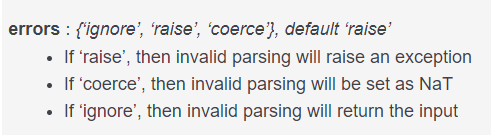

In [36]:
demo = demo.dropna(subset=['CrimeDateTime'])
demo.head()

,CrimeDateTime,Description,District,Latitude,Longitude
0,2022-07-09 09:30:00+00:00,ROBBERY - RESIDENCE,NORTHEAST,39.3223,-76.5467
1,2022-07-09 16:00:00+00:00,COMMON ASSAULT,SOUTHERN,39.2821,-76.6355
2,2022-07-09 00:34:28+00:00,SHOOTING,SOUTHWEST,39.2884,-76.6569
3,2022-07-09 00:34:28+00:00,SHOOTING,SOUTHWEST,39.2884,-76.6569
4,2022-07-09 18:00:00+00:00,COMMON ASSAULT,NORTHEAST,39.3188,-76.5872


In [37]:
pd.to_datetime(demo['CrimeDateTime'])

0        2022-07-09 09:30:00+00:00
1        2022-07-09 16:00:00+00:00
2        2022-07-09 00:34:28+00:00
3        2022-07-09 00:34:28+00:00
4        2022-07-09 18:00:00+00:00
                    ...           
527812   2013-07-31 17:45:00+00:00
527813   2013-07-31 14:15:00+00:00
527814   2013-07-31 21:00:00+00:00
527815   2013-07-31 17:00:00+00:00
527816   2013-07-31 11:40:00+00:00
Name: CrimeDateTime, Length: 527816, dtype: datetime64[ns, UTC]

### Timedeltas & Date Ranges

In [39]:
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQcpVvVioO23cndDwr1UmKhndrSq6ES6ZUKZ4fkBBqIAavd1_coVPO_yeOye-Ub-cAWlkX3psJvOU8o/pub?output=csv"
df = pd.read_csv(url)
df['datetime'] = pd.to_datetime(df['date'])

In [40]:
# set 'datetime' as the index
df = df.set_index('datetime')

In [41]:
# make the time delta
delta_3d = pd.to_timedelta(3,'D')
delta_3d

Timedelta('3 days 00:00:00')

In [42]:
max_date = df['humidity'].idxmax()
# calc 3 days BEFORE
pre_max = max_date - delta_3d
pre_max

Timestamp('2016-12-29 00:00:00')

In [43]:
# calc 3 days AFTER
post_max = max_date + delta_3d
post_max

Timestamp('2017-01-04 00:00:00')

In [47]:
mean_windspeed = df.loc[pre_max:post_max,'wind_speed'].mean()
mean_windspeed

4.89791666675

In [45]:
## making a date range to cover the pre-max to post-max window
date_range = pd.date_range(pre_max, post_max)
date_range

DatetimeIndex(['2016-12-29', '2016-12-30', '2016-12-31', '2017-01-01',
               '2017-01-02', '2017-01-03', '2017-01-04'],
              dtype='datetime64[ns]', freq='D')

In [49]:
# this will give an error
# df.loc[date_range,'wind_speed'].mean()